In [1]:
import GGanalysis as gg
import numpy as np

from endfield_gacha_model import *
from plot_tools import *


(<Figure size 720x720 with 2 Axes>,
 (<Axes: title={'center': '概率质量函数'}, ylabel='本抽概率'>,
  <Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>))

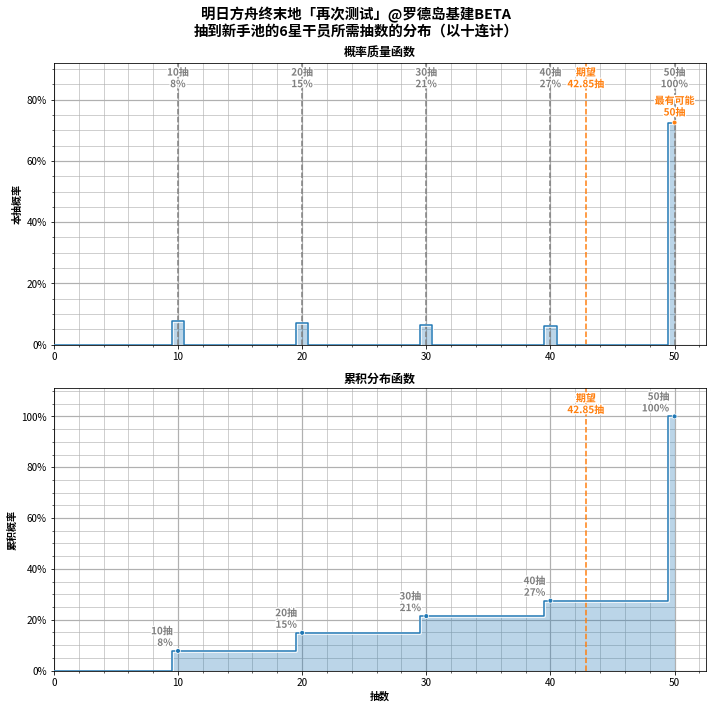

In [2]:
# 抽到新手池的6星干员所需抽数的分布（以十连计）

gacha_model = gg.PityModel(operator_pity_6x)
dist: gg.FiniteDist = gacha_model(item_num=1)
pmf = np.zeros(51)
pmf[10] = np.sum(dist.dist[0:11])
pmf[20] = np.sum(dist.dist[11:21])
pmf[30] = np.sum(dist.dist[21:31])
pmf[40] = np.sum(dist.dist[31:41])
pmf[50] = np.sum(dist.dist[41:])
dist = gg.FiniteDist(pmf)

quantile_poses = [0.05, 0.10, 0.20, 0.25, 0.99]

draw_pmf_cdf_fig(dist, "抽到新手池的6星干员所需抽数的分布（以十连计）", quantile_poses=quantile_poses, drawstyle="steps-mid")


(<Figure size 720x720 with 2 Axes>,
 (<Axes: title={'center': '概率质量函数'}, ylabel='本抽概率'>,
  <Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>))

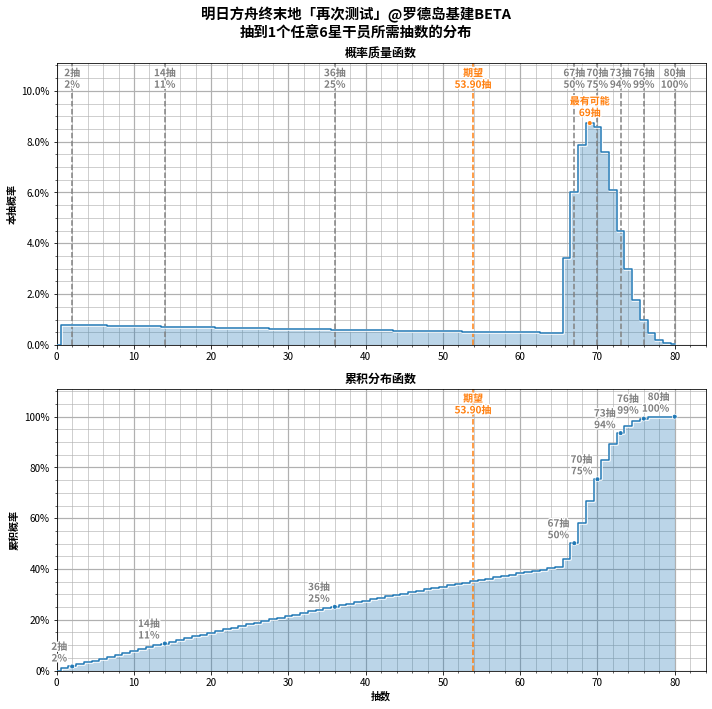

In [33]:
# 抽到1个任意6星干员所需抽数的分布

gacha_model = gg.PityModel(operator_pity_6x)
dist: gg.FiniteDist = gacha_model(item_num=1)

quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.99999]
draw_pmf_cdf_fig(dist, "抽到1个任意6星干员所需抽数的分布", quantile_poses, drawstyle="steps-mid")


array([0.        , 0.004     , 0.003984  , 0.00396806, 0.00395219,
       0.00393638, 0.00392064, 0.00390495, 0.00388934, 0.00387378,
       0.00385828, 0.00384285, 0.00382748, 0.00381217, 0.00379692,
       0.00378173, 0.0037666 , 0.00375154, 0.00373653, 0.00372159,
       0.0037067 , 0.00369187, 0.00367711, 0.0036624 , 0.00364775,
       0.00363316, 0.00361862, 0.00360415, 0.00358973, 0.00357537,
       0.00356107, 0.00354683, 0.00353264, 0.00351851, 0.00350444,
       0.00349042, 0.00347646, 0.00346255, 0.0034487 , 0.00343491,
       0.00342117, 0.00340748, 0.00339385, 0.00338028, 0.00336676,
       0.00335329, 0.00333988, 0.00332652, 0.00331321, 0.00329996,
       0.00328676, 0.00327361, 0.00326052, 0.00324747, 0.00323448,
       0.00322155, 0.00320866, 0.00319582, 0.00318304, 0.00317031,
       0.00315763, 0.003145  , 0.00313242, 0.00311989, 0.00310741,
       0.00309498, 0.01791456, 0.03101369, 0.04044605, 0.04501943,
       0.04458623, 0.04001775, 0.03287432, 0.02490472, 0.01756

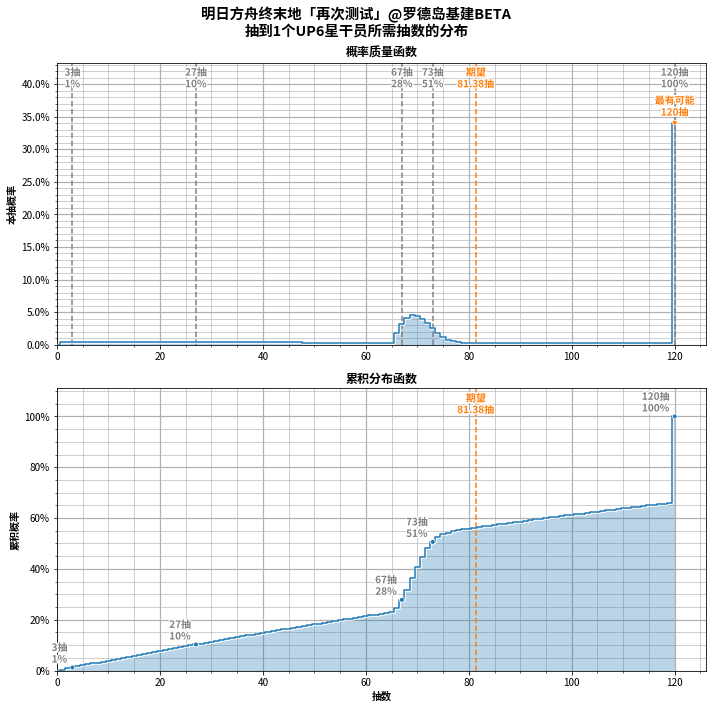

In [3]:
# 抽到1个UP6星干员所需抽数的分布

gacha_model = gg.PityBernoulliModel(operator_pity_6x, 1/2)
dist: gg.FiniteDist = gacha_model(item_num=1)
pmf = np.zeros(121)
pmf[:120] = dist.dist[:120]
pmf[120] = 1 - dist.cdf[119]
dist = gg.FiniteDist(pmf)

quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.99]

draw_pmf_cdf_fig(dist, "抽到1个UP6星干员所需抽数的分布", quantile_poses, drawstyle="steps-mid")

pmf


(<Figure size 720x720 with 2 Axes>,
 (<Axes: title={'center': '概率质量函数'}, ylabel='本抽概率'>,
  <Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>))

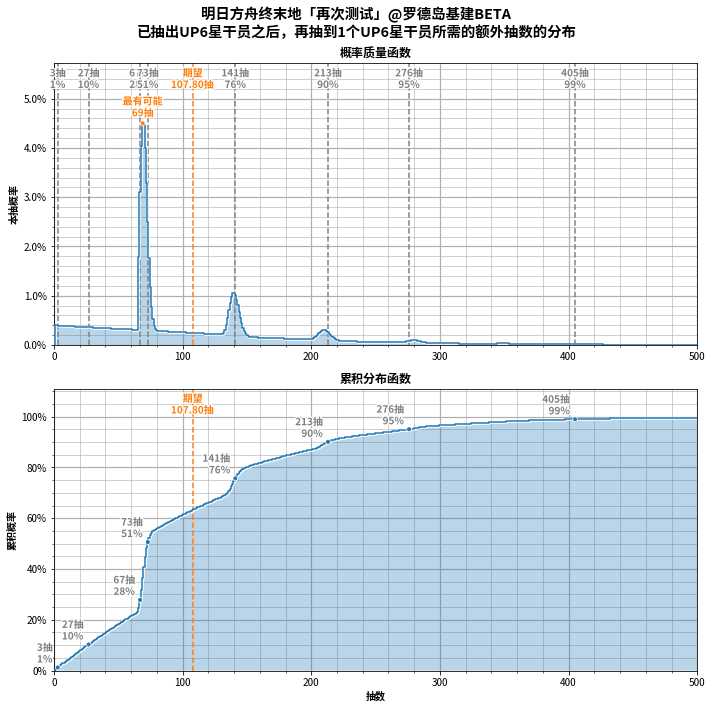

In [17]:
# 已抽出当期UP6星干员之后，再抽到1个当期UP6星干员所需的额外抽数

gacha_model = gg.PityBernoulliModel(operator_pity_6x, 1/2)
dist: gg.FiniteDist = gacha_model(item_num=1)

quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

draw_pmf_cdf_fig(dist, "已抽出UP6星干员之后，再抽到1个UP6星干员所需的额外抽数的分布", quantile_poses, x_max=500, drawstyle="steps-mid")


np.float64(1.3326508925750667e-05)

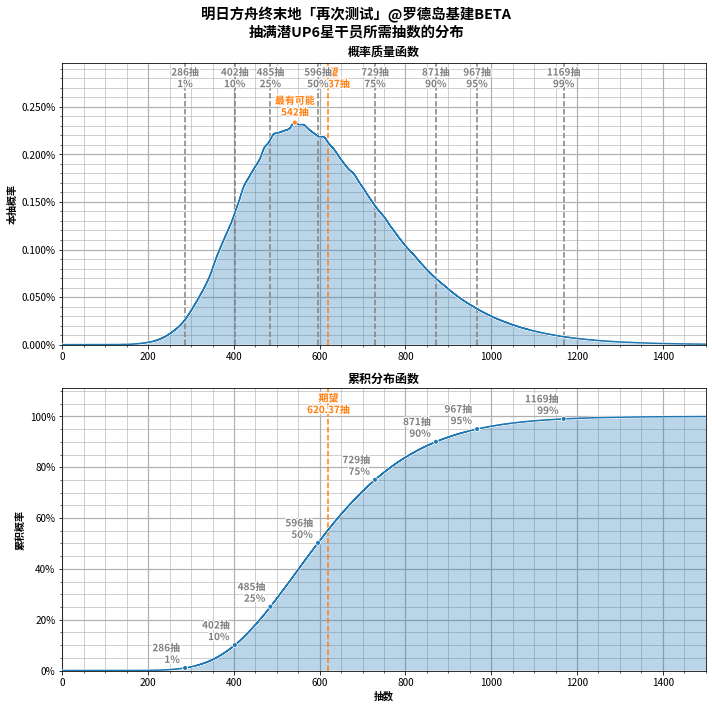

In [18]:
# 抽满潜UP6星干员所需抽数的分布

gacha_model = gg.PityBernoulliModel(operator_pity_6x, 1/2)
next_6x_dist: gg.FiniteDist = gacha_model(item_num=1)
pmf = np.zeros(121)
pmf[:120] = next_6x_dist.dist[:120]
pmf[120] = 1 - next_6x_dist.cdf[119]
first_6x_dist = gg.FiniteDist(pmf)

N = 6
get_all_6x_dist = first_6x_dist * next_6x_dist ** (N - 1)

quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

draw_pmf_cdf_fig(get_all_6x_dist, f"抽满潜UP6星干员所需抽数的分布", quantile_poses, x_max=1500, drawstyle="steps-mid")


(<Figure size 720x432 with 1 Axes>,
 (<Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>,))

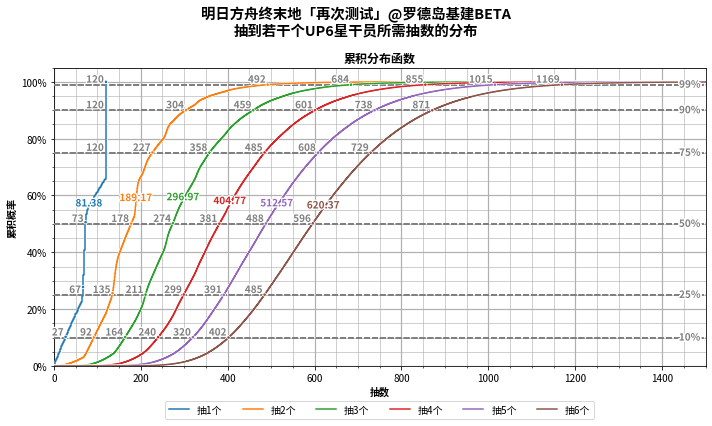

In [7]:
# 抽到若干个UP6星干员所需抽数的分布

gacha_model = gg.PityBernoulliModel(operator_pity_6x, 1/2)
next_6x_dist: gg.FiniteDist = gacha_model(item_num=1)
pmf = np.zeros(121)
pmf[:120] = next_6x_dist.dist[:120]
pmf[120] = 1 - next_6x_dist.cdf[119]
first_6x_dist = gg.FiniteDist(pmf)

N = 6
get_n_6x_dist_list = [first_6x_dist * next_6x_dist ** (n - 1) for n in range(1, N+1)]

x_max = 1500
quantile_poses = [0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
drawstyle = "steps-mid"
title = "抽到若干个UP6星干员所需抽数的分布"

draw_multi_cdf_fig(get_n_6x_dist_list, [f"抽{n}个" for n in range(1, N+1)], title, quantile_poses, x_max, drawstyle)


(<Figure size 720x720 with 2 Axes>,
 (<Axes: title={'center': '概率质量函数'}, ylabel='本抽概率'>,
  <Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>))

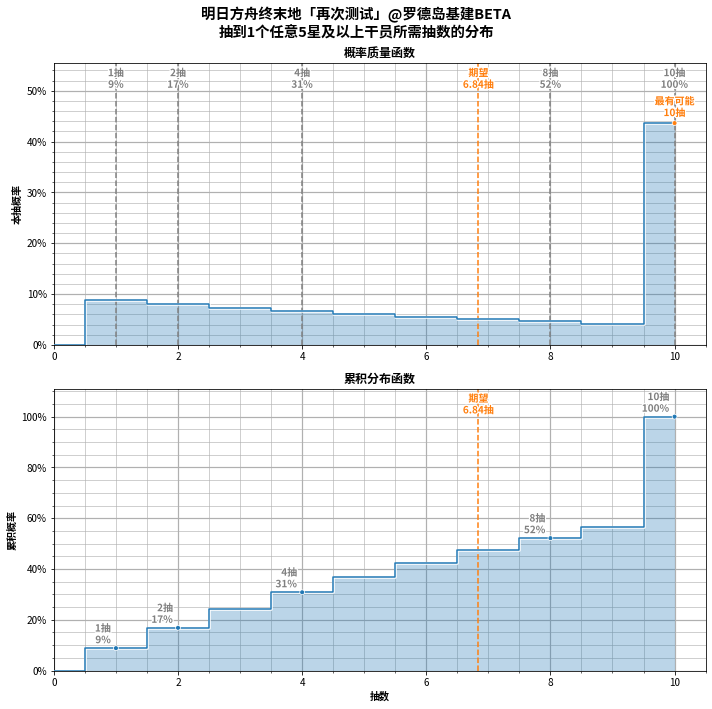

In [20]:
# 任意5星及以上干员
gacha_model = gg.PityModel([0, 0.088, 0.088, 0.088, 0.088, 0.088, 0.088, 0.088, 0.088, 0.088, 1])
dist: gg.FiniteDist = gacha_model(item_num=1)

quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.99]

draw_pmf_cdf_fig(dist, "抽到1个任意5星及以上干员所需抽数的分布", quantile_poses, drawstyle="steps-mid")


(<Figure size 720x720 with 2 Axes>,
 (<Axes: title={'center': '概率质量函数'}, ylabel='本抽概率'>,
  <Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>))

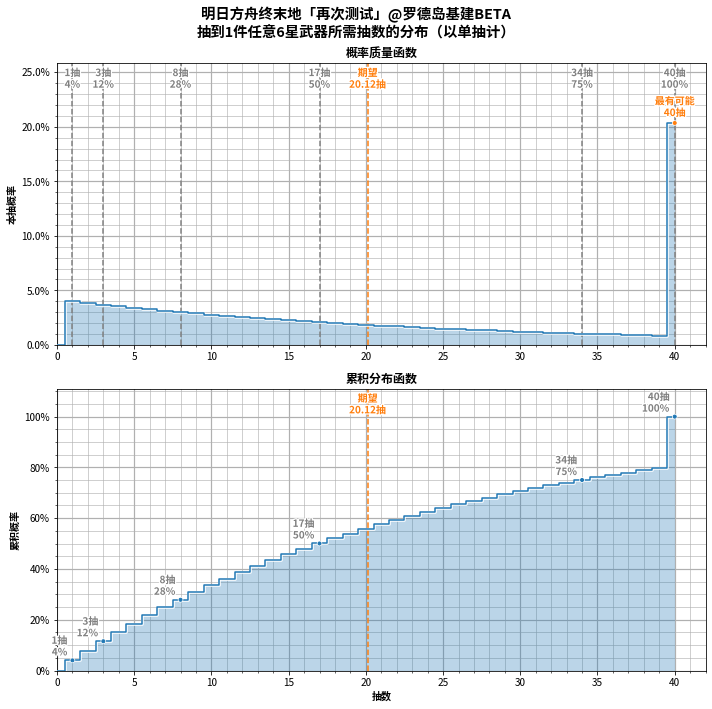

In [9]:
# 抽到1件任意6星武器所需抽数的分布（以单抽计）

gacha_model = gg.PityModel(weapon_pity_6x)
dist: gg.FiniteDist = gacha_model(item_num=1)

quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.75, 0.99]

draw_pmf_cdf_fig(dist, "抽到1件任意6星武器所需抽数的分布（以单抽计）", quantile_poses, drawstyle="steps-mid")


np.float64(0.42586682490819194)

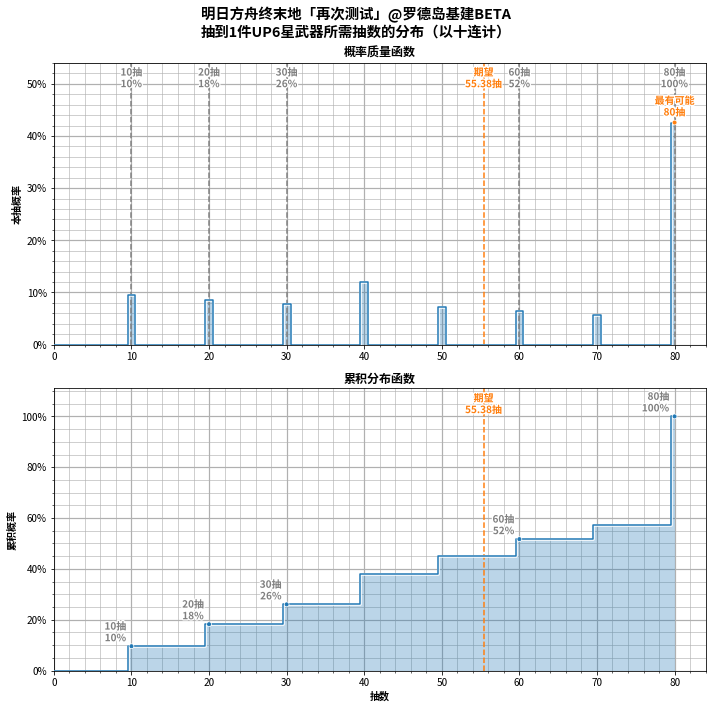

In [21]:
# 抽到1件UP6星武器所需抽数的分布（以十连计）

gacha_model = gg.PityBernoulliModel(weapon_pity_6x, 1/4)
dist: gg.FiniteDist = gacha_model(item_num=1)
pmf = np.zeros(81)
for i in range(1, 8):
    pmf[i*10] = np.sum(dist.dist[(i-1)*10+1:i*10+1])
pmf[80] = 1 - dist.cdf[70]
dist = gg.FiniteDist(pmf)
quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.99]

draw_pmf_cdf_fig(dist, "抽到1件UP6星武器所需抽数的分布（以十连计）", quantile_poses, drawstyle="steps-mid")
pmf[80]


(<Figure size 720x720 with 2 Axes>,
 (<Axes: title={'center': '概率质量函数'}, ylabel='本抽概率'>,
  <Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>))

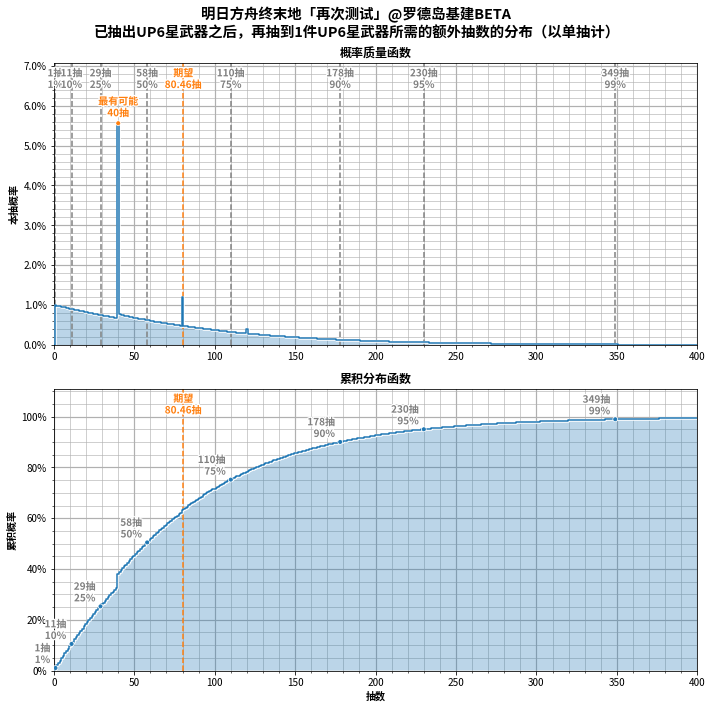

In [11]:
# 已抽出UP6星武器之后，再抽到1件UP6星武器所需的额外抽数的分布（以单抽计）

gacha_model = gg.PityBernoulliModel(weapon_pity_6x, 1/4)
dist: gg.FiniteDist = gacha_model(item_num=1)

quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

draw_pmf_cdf_fig(dist, "已抽出UP6星武器之后，再抽到1件UP6星武器所需的额外抽数的分布（以单抽计）", quantile_poses, x_max=400, drawstyle="steps-mid")


(<Figure size 720x720 with 2 Axes>,
 (<Axes: title={'center': '概率质量函数'}, ylabel='本抽概率'>,
  <Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>))

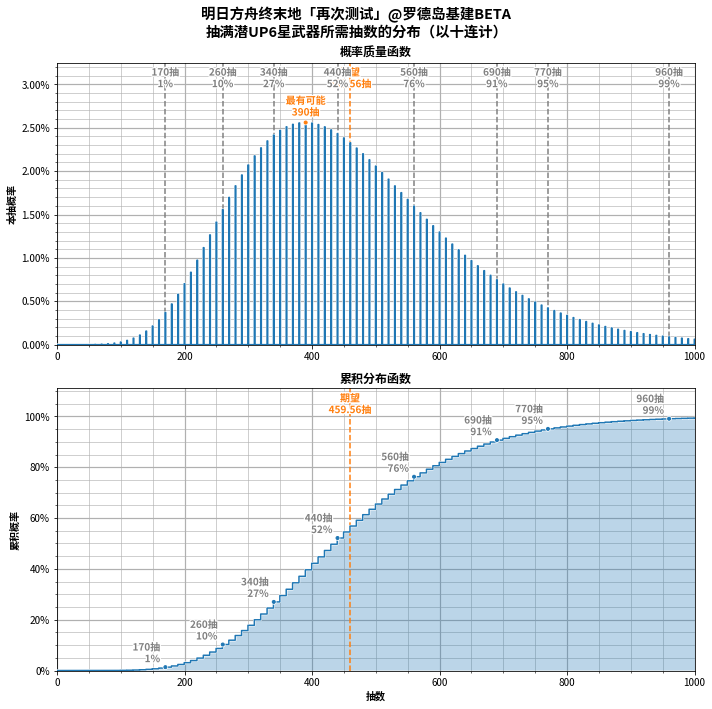

In [12]:
# 满潜当期UP6星武器

gacha_model = gg.PityBernoulliModel(weapon_pity_6x, 1/4)
next_6x_dist: gg.FiniteDist = gacha_model(item_num=1)
pmf = np.zeros(81)
pmf[:80] = next_6x_dist.dist[:80]
pmf[80] = 1 - next_6x_dist.cdf[79]
first_6x_dist = gg.FiniteDist(pmf)

N = 6
get_all_6x_dist = first_6x_dist * next_6x_dist ** (N - 1)

m = int(np.ceil(len(get_all_6x_dist.dist) / 10))
pmf = np.zeros(m*10+1)
for i in range(1, m):
    pmf[i*10] = np.sum(get_all_6x_dist.dist[(i-1)*10+1:i*10+1])
get_all_6x_dist = gg.FiniteDist(pmf)

quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

draw_pmf_cdf_fig(get_all_6x_dist, f"抽满潜UP6星武器所需抽数的分布（以十连计）", quantile_poses, x_max=1000, drawstyle="steps-mid")


(<Figure size 720x432 with 1 Axes>,
 (<Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>,))

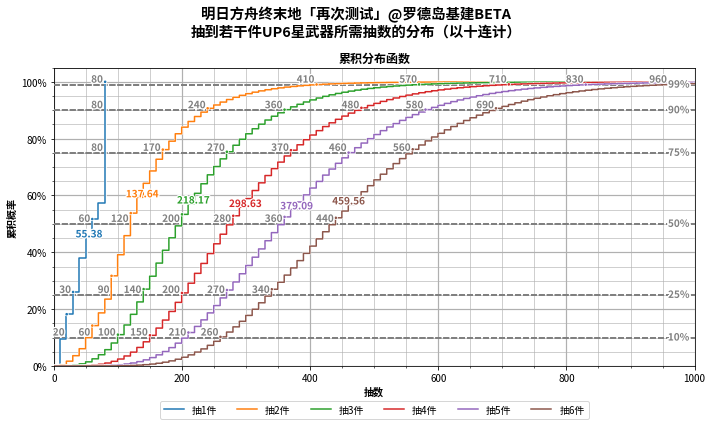

In [16]:
# 抽若干件UP6星武器所需抽数的分布（以十连计）

gacha_model = gg.PityBernoulliModel(weapon_pity_6x, 1/4)
next_6x_dist: gg.FiniteDist = gacha_model(item_num=1)
pmf = np.zeros(81)
pmf[:80] = next_6x_dist.dist[:80]
pmf[80] = 1 - next_6x_dist.cdf[79]
first_6x_dist = gg.FiniteDist(pmf)

N = 6
get_n_6x_dist_list = []
for n in range(N):
    dist = first_6x_dist * next_6x_dist ** n
    m = int(np.ceil(len(dist.dist) / 10))
    pmf = np.zeros(m*10+1)
    for i in range(1, m):
        pmf[i*10] = np.sum(dist.dist[(i-1)*10+1:i*10+1])
    dist = gg.FiniteDist(pmf)
    get_n_6x_dist_list.append(dist)

x_max = 1000
quantile_poses = [0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
drawstyle = "steps-mid"
title = "抽到若干件UP6星武器所需抽数的分布（以十连计）"

draw_multi_cdf_fig(get_n_6x_dist_list, [f"抽{n}件" for n in range(1, N+1)], title, quantile_poses, x_max, drawstyle)


In [14]:
from GGanalysis.markov_method import PriorityPitySystem

gacha_system = PriorityPitySystem([operator_pity_6x, operator_pity_5x], remove_pity=True)
sp6, sp5 = gacha_system.get_stationary_p()
print(sp6, sp5)


0.01855312574859673 0.13411295200285417


# 